A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2.3.1


In [17]:
digits_mnist = tf.keras.datasets.mnist
digits_mnist

<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\jl\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [18]:
(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()


Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* del número que la imagen representa.

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset,lo almaceno aqui para usarlos luego cuando se visualicen las imagenes:

In [29]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

## Explore el set de datos

Hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [19]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [20]:
train_labels.shape

(60000,)

In [21]:
len(train_labels)

60000

Cada etiqueta es un integer entre 0 y 9:

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [23]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [24]:
len(test_labels)

10000

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

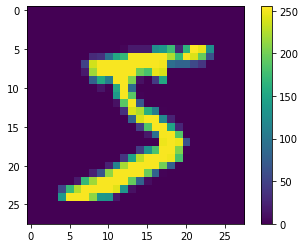

In [25]:
# Muestro la primera imagen del conjunto de entrenamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalo estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal(los normalizo). Para hacerlo, divido los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:
Al mismo tiempo aprovecho para asegurarnos de que los datos estén representados con floats de 32-bits y los paso a ese tipo. Esto es para evitar

In [27]:
train_images = train_images.astype('float32') / 255.0

test_images = test_images.astype('float32') / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

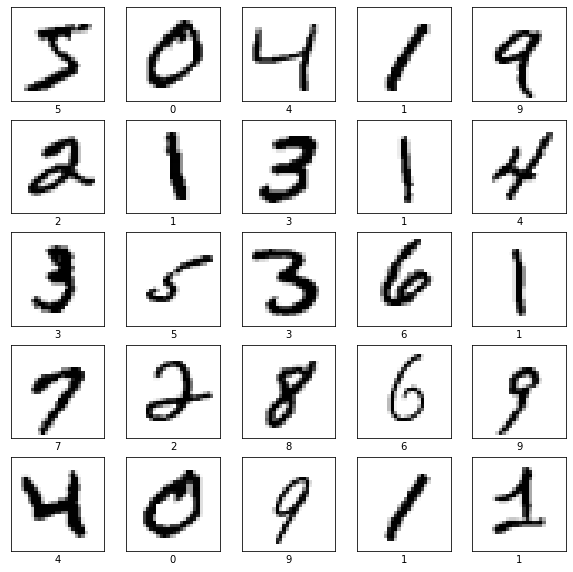

In [32]:
# Con cmap=plt.cm.binary paso las imagens a dos colores, blanco o negro y toda la serie de grises que hay entre medias de esos dos colores.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# APARTADO 1

Realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

In [33]:
# Debido a que son imágenes en escala de grises, el único canal de color se halla implícito. Sin embargo, Keras espera tensores de 4 dimensiones (incluyendo el batch size), no de 3, por lo que tenemos que expandir las dimensiones de los datos.
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (60000, 28, 28, 1)
test_images_gr shape: (10000, 28, 28, 1)


In [34]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model = keras.models.Sequential()

# First conv-pool layers with 8 neurons and MaxPool2d
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer (32 neurons) with dropout (0.25)
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer with 10 neurons
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
____________________________________________________

### Compilo el modelo
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo

Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entreno el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [37]:
history = model.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 1.2887 - accuracy: 0.5650
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.6760 - accuracy: 0.7774
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.5984 - accuracy: 0.8024
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5637 - accuracy: 0.8147
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5443 - accuracy: 0.8218
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5289 - accuracy: 0.8280
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5155 - accuracy: 0.8316
Epoch 8/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5075 - accuracy: 0.8353
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.4943 - accuracy: 0.8416
Epoch 10/10
1875/1875 [==============================] - 52s 28m

## Evaluar Exactitud

Comparo el rendimiento del modelo con el set de datos:

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.2711 - accuracy: 0.9213

Test accuracy: 0.9212999939918518


## Hacer predicciones
Con el modelo entrenado puedo hacer predicciones sobre imágenes

In [39]:
predictions = model.predict(test_images)

In [40]:
predictions[0]

array([1.0036222e-06, 6.5253303e-10, 3.4254848e-05, 3.3023485e-04,
       3.5590675e-09, 5.9177614e-06, 1.1434829e-09, 9.9902630e-01,
       7.4997769e-07, 6.0158019e-04], dtype=float32)

In [41]:
# Me dará la label del número que tiene más posibilidades de ser, en este caso la posición con el indice 7 que se corresponde con la etiqueta 7 y el valor 7. Tiene una posibilidad de ser el nº 7 del 0.99902630
np.argmax(predictions[0])

7

In [42]:
#Ahora compruebo que etiqueta tiene ese elemento del conjunto de test y como sale 7, implica que es correcta la predicción
test_labels[0]

7

In [44]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

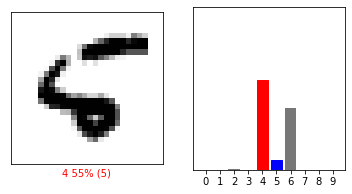

In [47]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

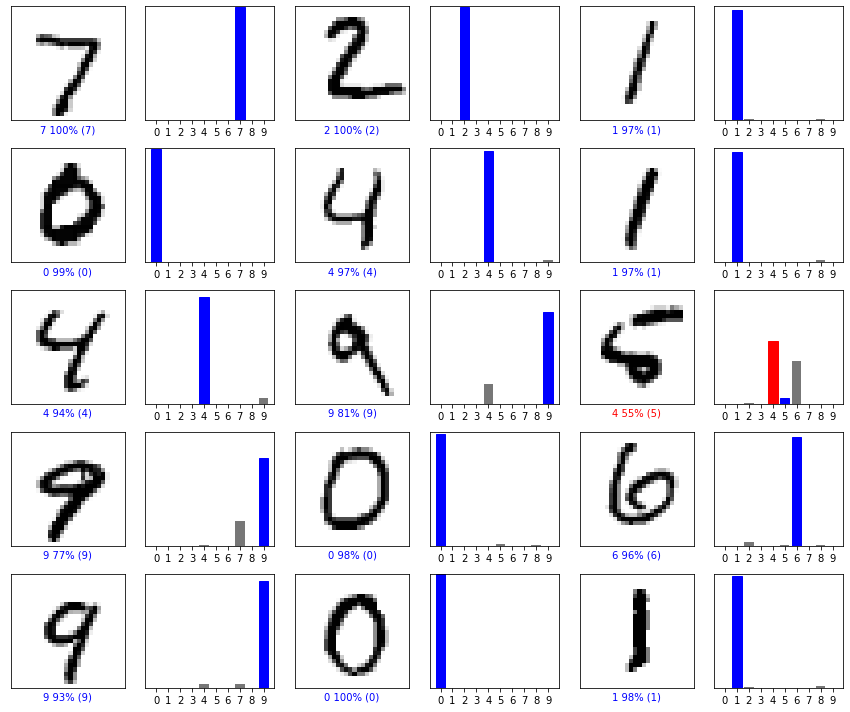

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [53]:
# Grab an image from the test dataset.
img = test_images[22]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

Ahora predigo la etiqueta correcta para esta imagen:

In [54]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [55]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.46338605e-06 1.08718993e-02 1.96063682e-01 1.38747360e-04
  7.04242811e-02 4.33021050e-04 7.20571578e-01 1.01424824e-03
  4.61763149e-04 1.13072065e-05]]


`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

6

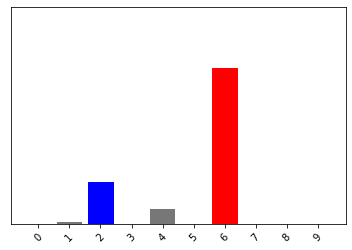

In [57]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Número que predice
np.argmax(predictions_single[0])

En este caso ha sido erronea la predicción. El modelo dijo que podría ser un 6 cuando en realidad es un 2

# APARTADO 2

Realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas    
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

El conjunto de train y de text sigue siendo el mismo que el utilizado para el apartado 1

In [59]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model2 = keras.models.Sequential()

# First conv-pool layers with 8 neurons and MaxPool2d
model2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model2.add(keras.layers.Flatten())

# Dense layer with 16 neurons
model2.add(keras.layers.Dense(units=16, activation="relu"))
# Dense layer (32 neurons) with dropout (0.25)
model2.add(keras.layers.Dense(units=32, activation="relu"))
model2.add(keras.layers.Dropout(rate=0.25))
# Output layer with 10 neurons
model2.add(keras.layers.Dense(units=10, activation="softmax"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                21648     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

Compilo el modelo

In [60]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entreno el modelo

In [61]:
history = model2.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 1.4831 - accuracy: 0.4485
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.7889 - accuracy: 0.7399
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.6268 - accuracy: 0.8065
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5528 - accuracy: 0.8334
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.4611 - accuracy: 0.8629
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4126 - accuracy: 0.8785
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.3922 - accuracy: 0.8845
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3720 - accuracy: 0.8910
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3639 - accuracy: 0.8929
Epoch 10/10
1875/1875 [==============================] - 59s 31m

## Evaluo la Exactitud

Comparo el rendimiento del modelo sobre el set de datos:

In [66]:
test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc2)

313/313 - 3s - loss: 0.2771 - accuracy: 0.9185

Test accuracy: 0.9185000061988831


## Hago predicciones

Con el modelo entrenado puede usarlo para hacer predicciones sobre imagenes.

In [63]:
predictions2 = model2.predict(test_images)
predictions2[22] # Estoy prediciendo la imagen nº 22
np.argmax(predictions2[22])

6

In [64]:
# Compruebo que esa sea realmente la etiqueta de la test images
test_labels[22]

6

En este segundo apartado el resultado es un poquito peor, hemos pasado de un accuracy en el apartado 1 de 0.9212999939918518 a en el apartado 2 de 0.9185000061988831